# Candidate Test 2022 Analysis Part 1

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2).

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:
- Age of the candidates grouped by parties.
- An overview of the most "confident" candidates, i.e., those with the highest proportion of "strongly agree" or "strongly disagree" responses.
- Differences in responses between candidates, both inter-party and intra-party, along with an explanation of which parties have the most internal disagreements.
- Classification models to predict candidates' party affiliations. Investigate if there are any candidates who seem to be in the "wrong" party based on their political landscape positions. You must use the following three algorithms: **Decision Tree, Random Forrest, and Gradient Boosted Tree**, and **two other** classification algorithms of your choice.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



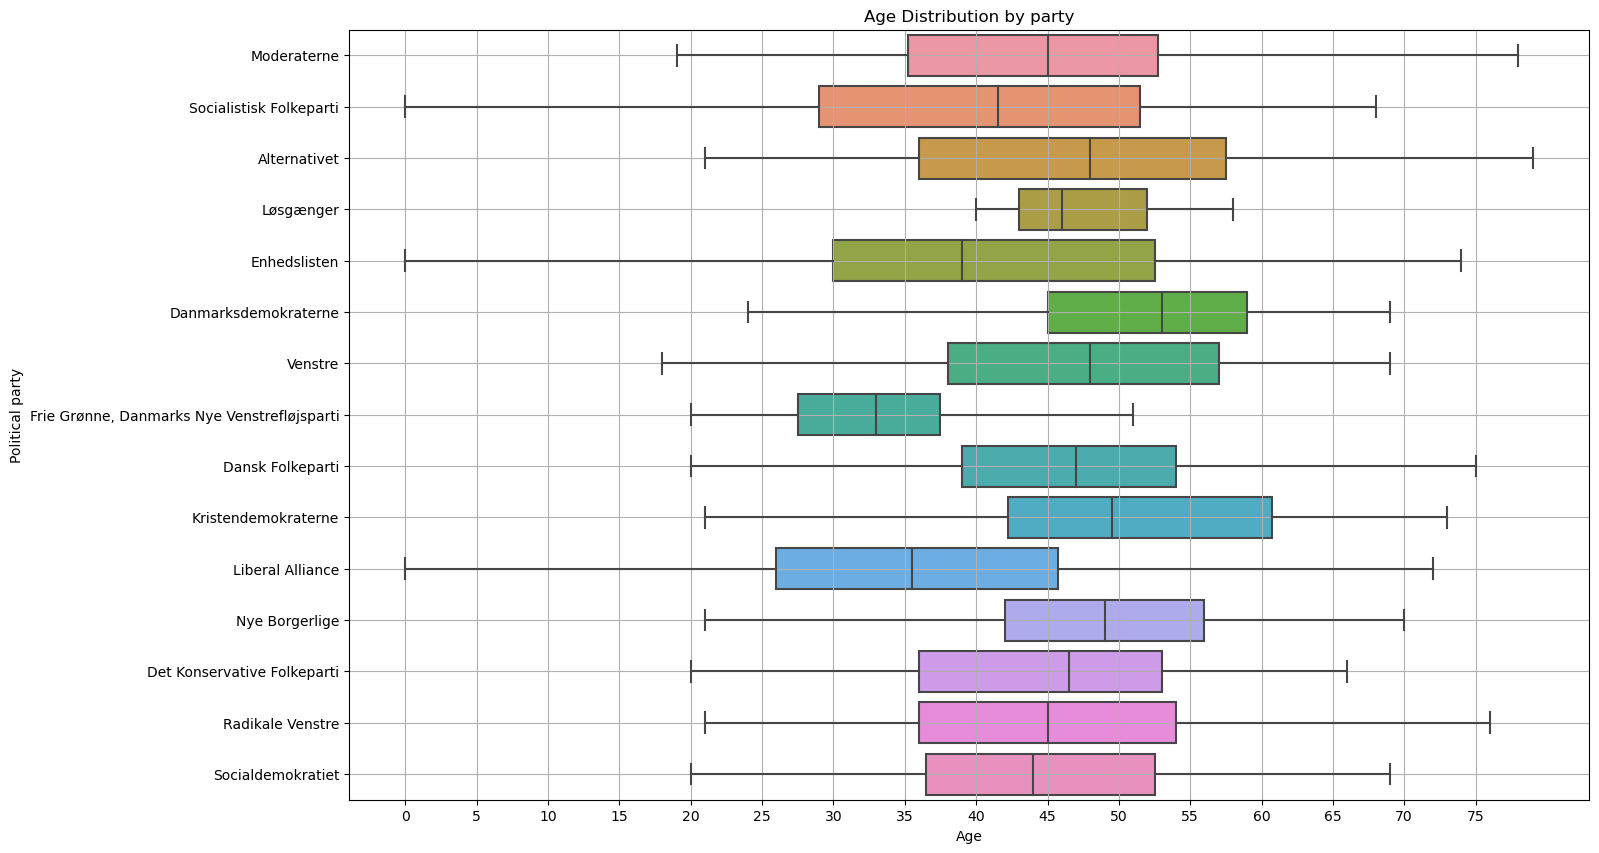

In [123]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

all_data = pd.read_excel('alldata.xlsx')
all_data = all_data.dropna()
all_data_grouped_by_party = all_data[['parti', 'alder']].groupby(['parti'])

fig = plt.figure(figsize =(16, 10))

sns.boxplot(data=all_data, x='alder', y='parti', showfliers=False)
plt.title('Age Distribution by party')
plt.ylabel('Political party')
plt.xlabel('Age')
plt.xticks(np.arange(0, 80, 5))
plt.grid(True)


navn                   Søren Vanting
parti    Det Konservative Folkeparti
Name: 88, dtype: object

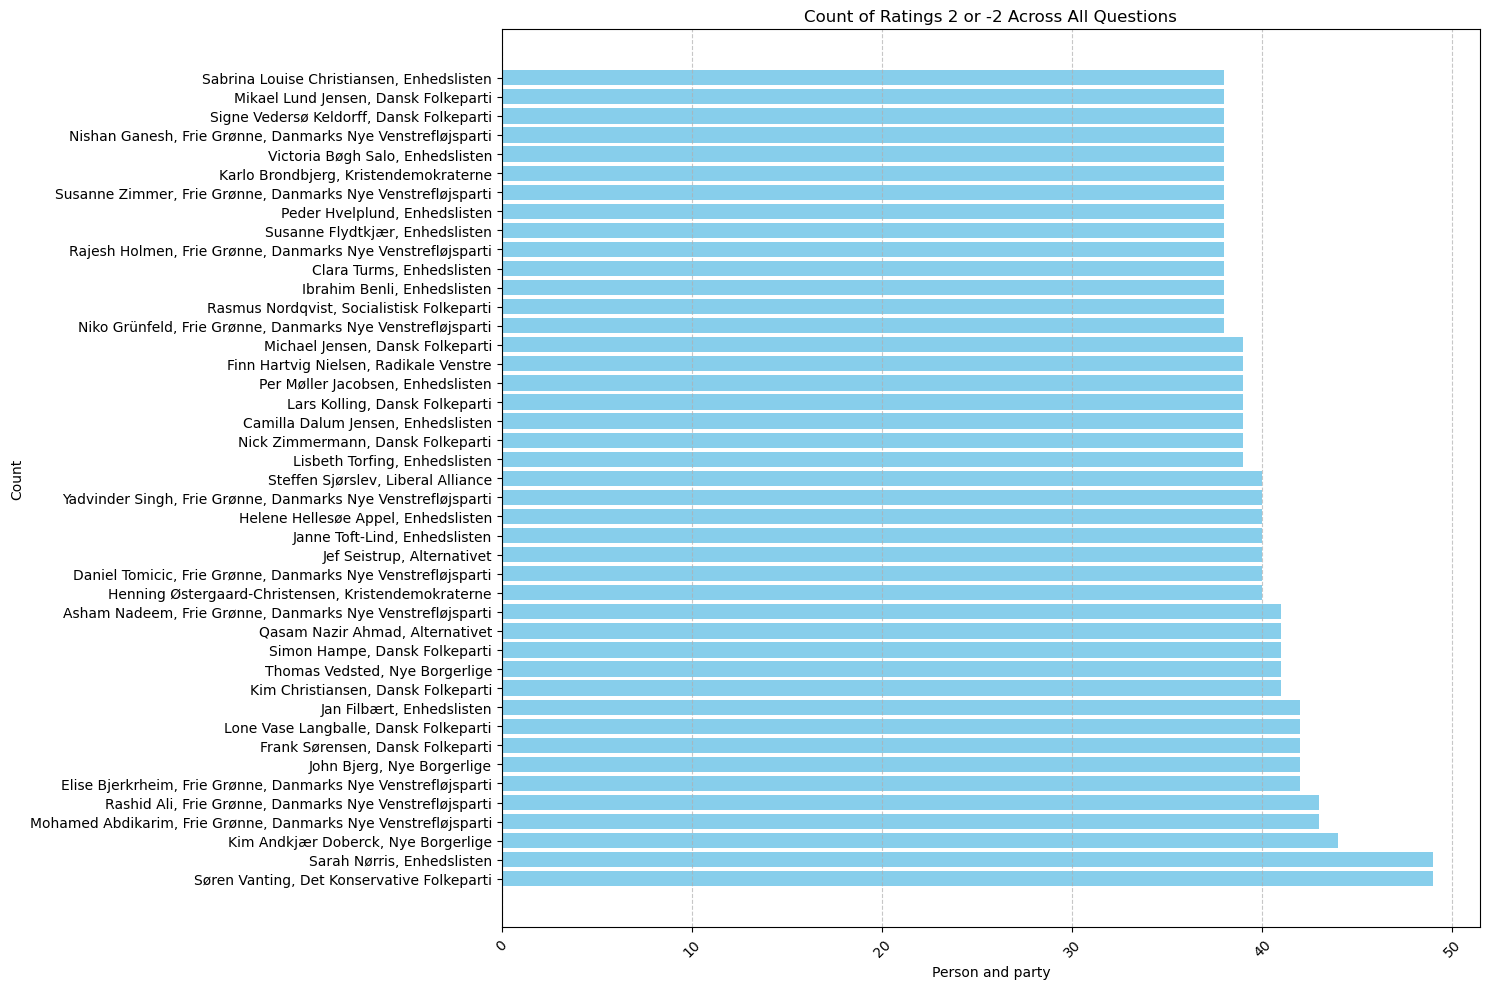

In [14]:
# display(all_data['parti'])
# parti, navn

question_columns =  all_data.drop(['parti', 'navn', 'alder', 'storkreds'], axis=1)
# counts = all_data.groupby(['parti', 'navn']).apply(lambda x: (x == 2).sum() + (x == -2).sum())
counts = question_columns.apply(lambda row: ((row == 2) | (row == -2)).sum(), axis=1)
display(all_data.loc[counts.idxmax(), ['navn', 'parti']])

most_confident = counts.nlargest(int(len(counts) * 0.05))
labels = [f"{all_data['navn'][navn]}, {parti}" for navn, parti in zip(most_confident.index, all_data.loc[most_confident.index, 'parti'])]

plt.figure(figsize=(15, 10))
plt.barh(labels, most_confident.values, color='skyblue')
plt.title('Count of Ratings 2 or -2 Across All Questions')
plt.ylabel('Person and party')
plt.xlabel('Count')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [65]:
data_only_questions_and_parti = question_columns =  all_data.drop(['navn', 'alder', 'storkreds'], axis=1)
data3 = data_only_questions_and_parti.drop(['parti'], axis=1)

total_differences = []

# This function calculates differences between each of the candidates (1st to 2nd, 1st to 3rd... etc.)           
def differenceCalculator(data):
    n = len(data)
    # Pre-calculate properties to avoid repeated function calls
    properties = {'navn': all_data['navn'], 'parti': all_data['parti']}
    
    for i in range(n):
        person1 = data.iloc[i]
        name1, party1 = properties['navn'][i], properties['parti'][i]
        for j in range(i + 1, n):
            person2 = data.iloc[j]
            name2, party2 = properties['navn'][j], properties['parti'][j]
            # In this line we subtract each question and then sum those differences
            # absoluteValue of (-1-2) = 3 and so on... (don't agree - strongly agree)
            difference = abs(person1 - person2).sum() 
            total_differences.append((i, j, name1, name2, party1, party2, difference))
    return total_differences

differenceCalculator(data3)

# Convert the list of differences to DataFrame
differences_df = pd.DataFrame(total_differences, columns=['id1', 'id2','candidate1','candidate2', 'parti1', 'parti2', 'totalDifference'])

print("Total differences between each pair of persons:")
print(differences_df.sort_values(by='totalDifference', ascending=False))





Total differences between each pair of persons:
        id1  id2                   candidate1          candidate2  \
310132  505  568                 Sarah Nørris        Rikke Norlyk   
310121  505  557                 Sarah Nørris      Thomas Vedsted   
310390  505  826                 Sarah Nørris  Louise Siv Ebbesen   
327568  557  610               Thomas Vedsted       Jonas Paludan   
307573  498  557  Sabrina Louise Christiansen      Thomas Vedsted   
...     ...  ...                          ...                 ...   
329935  564  842             Pernille Vermund        Ulla Kokfelt   
357241  675  842      Peter Seier Christensen        Ulla Kokfelt   
203225  279  672                Brian Nielsen   Jan Bigum Warming   
203117  279  564                Brian Nielsen    Pernille Vermund   
329765  564  672             Pernille Vermund   Jan Bigum Warming   

                parti1                       parti2  totalDifference  
310132    Enhedslisten  Det Konservative Folkeparti 

In [99]:
diff_drop_without_party = differences_df[~((differences_df['parti1'] == 'Løsgænger') | (differences_df['parti2'] == 'Løsgænger'))]
diff_no_id = diff_drop_without_party.drop(['id1', 'id2'], axis=1)
display(diff_no_id.sort_values(by='totalDifference', ascending=False).head(20)) 
# Interparty differences in desceding order, only first 20.
# As expected the Far-left Enhedslisten and the Far-right Det Konservative Folkeparti
# have the highest difference in their answers.
# One can also observe that Sarah Norris from Enhedslisten is the most conservative candidate on the left.

,candidate1,candidate2,parti1,parti2,totalDifference
310132,Sarah Nørris,Rikke Norlyk,Enhedslisten,Det Konservative Folkeparti,168
310121,Sarah Nørris,Thomas Vedsted,Enhedslisten,Nye Borgerlige,166
310390,Sarah Nørris,Louise Siv Ebbesen,Enhedslisten,Liberal Alliance,162
307573,Sabrina Louise Christiansen,Thomas Vedsted,Enhedslisten,Nye Borgerlige,161
327568,Thomas Vedsted,Jonas Paludan,Nye Borgerlige,Enhedslisten,161
310122,Sarah Nørris,Marianne Mathiesen,Enhedslisten,Nye Borgerlige,160
310111,Sarah Nørris,Carl Andersen,Enhedslisten,Liberal Alliance,160
307940,Marianne Mose,Thomas Vedsted,Enhedslisten,Nye Borgerlige,158
310138,Sarah Nørris,Dan Foss Kragh,Enhedslisten,Det Konservative Folkeparti,158
274345,Per Møller Jacobsen,Louise Siv Ebbesen,Enhedslisten,Liberal Alliance,158


In [101]:
display(diff_no_id.sort_values(by='totalDifference', ascending=True).head(20)) 
# Interparty differences in ascending order, only first 20
# As you can see, the first 20 entries are only candidates within the same party
# Let's see what are the smallest differences between candidates from different parties

,candidate1,candidate2,parti1,parti2,totalDifference
203225,Brian Nielsen,Jan Bigum Warming,Nye Borgerlige,Nye Borgerlige,0
203117,Brian Nielsen,Pernille Vermund,Nye Borgerlige,Nye Borgerlige,0
357241,Peter Seier Christensen,Ulla Kokfelt,Nye Borgerlige,Nye Borgerlige,0
329765,Pernille Vermund,Jan Bigum Warming,Nye Borgerlige,Nye Borgerlige,0
328443,Hans-Christian Gjerlevsen,Pernille Vermund,Nye Borgerlige,Nye Borgerlige,1
203113,Brian Nielsen,Hans-Christian Gjerlevsen,Nye Borgerlige,Nye Borgerlige,1
256391,Nicolaj Holm Pedersen,Peter Seier Christensen,Nye Borgerlige,Nye Borgerlige,1
356498,Jan Bigum Warming,Peter Seier Christensen,Nye Borgerlige,Nye Borgerlige,1
203395,Brian Nielsen,Ulla Kokfelt,Nye Borgerlige,Nye Borgerlige,1
256558,Nicolaj Holm Pedersen,Ulla Kokfelt,Nye Borgerlige,Nye Borgerlige,1


In [122]:
diff_inter = diff_no_id[differences_df['parti1'] != differences_df['parti2']]
display(diff_inter.sort_values(by='totalDifference', ascending=True).head(20)) 

#As you can see the candidates from the left have the most in common,
#In particular the Enhedslisten and Socialistisk Folkeparti.

C:\Users\fisch\AppData\Local\Temp\ipykernel_9048\3110285967.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diff_inter = diff_no_id[differences_df['parti1'] != differences_df['parti2']]


,candidate1,candidate2,parti1,parti2,totalDifference
21403,Mai Villadsen,Anna Brændemose,Enhedslisten,Socialistisk Folkeparti,13
65751,Anna Brændemose,Sabrina Louise Christiansen,Socialistisk Folkeparti,Enhedslisten,14
65385,Anna Brændemose,Ibrahim Benli,Socialistisk Folkeparti,Enhedslisten,15
14809,Torsten Gejl,Peder Hvelplund,Alternativet,Enhedslisten,15
65387,Anna Brændemose,Pelle Dragsted,Socialistisk Folkeparti,Enhedslisten,16
117558,Iben Kirstine Parmann,Charlotte Lindberg,"Frie Grønne, Danmarks Nye Venstrefløjsparti",Enhedslisten,16
65865,Anna Brændemose,Trine Pertou Mach,Socialistisk Folkeparti,Enhedslisten,16
64964,Rasmus Nordqvist,Sabrina Louise Christiansen,Socialistisk Folkeparti,Enhedslisten,16
61017,Søren Lahn Sloth,Selma Bolø,Socialistisk Folkeparti,Enhedslisten,16
140090,Cecilie Holdt,Selma Bolø,Socialistisk Folkeparti,Enhedslisten,16


In [121]:
# Now let's try to see what are the parties with the highest internal disagreements
diff_intra = diff_no_id[differences_df['parti1'] == differences_df['parti2']]
display(diff_intra.sort_values(by='totalDifference', ascending=False).head(20)) 

# From this table we can see that Det Konservative Folkeparti has the most considerable differences
# within their own party, Kristendemokraterne have also a lof disagreements

C:\Users\fisch\AppData\Local\Temp\ipykernel_9048\2051283420.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  diff_intra = diff_no_id[differences_df['parti1'] == differences_df['parti2']]


,candidate1,candidate2,parti1,parti2,totalDifference
263595,Mai Mercado,Mads Silberg,Det Konservative Folkeparti,Det Konservative Folkeparti,92
211345,Per Larsen,Mads Silberg,Det Konservative Folkeparti,Det Konservative Folkeparti,92
259783,Emil Holbech Hansen,Mads Silberg,Det Konservative Folkeparti,Det Konservative Folkeparti,91
334468,Niels Flemming Hansen,Mads Silberg,Det Konservative Folkeparti,Det Konservative Folkeparti,90
74523,Marcus Knuth,Mads Silberg,Det Konservative Folkeparti,Det Konservative Folkeparti,90
357838,Mads Silberg,Andreas Karlsen,Det Konservative Folkeparti,Det Konservative Folkeparti,90
207892,Karsten Skov Petersen,Mads Silberg,Det Konservative Folkeparti,Det Konservative Folkeparti,90
45119,Henning Østergaard-Christensen,Finn Andersen,Kristendemokraterne,Kristendemokraterne,90
357839,Mads Silberg,Brigitte Klintskov Jerkel,Det Konservative Folkeparti,Det Konservative Folkeparti,89
152445,Helle Jønch,Mads Silberg,Det Konservative Folkeparti,Det Konservative Folkeparti,89


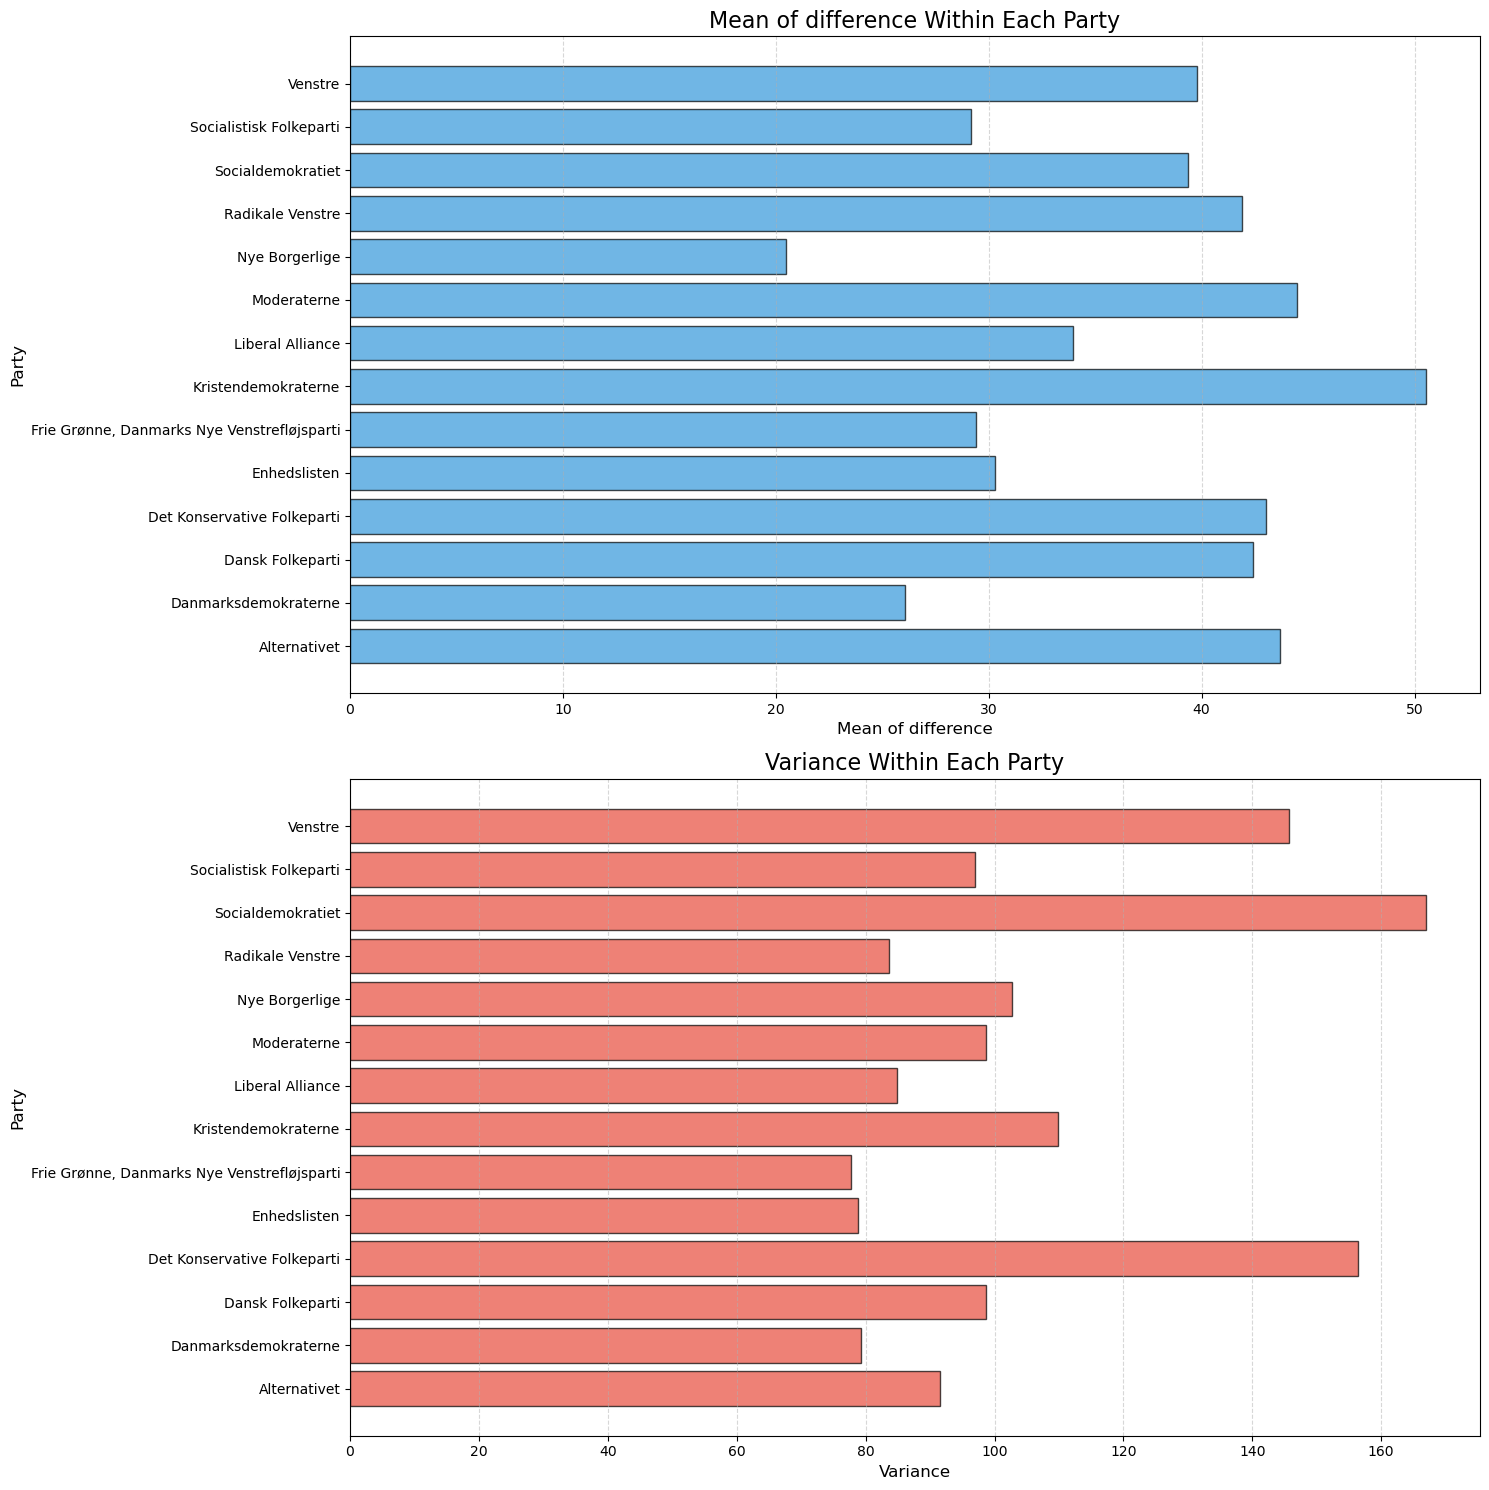

In [120]:
#Let's take a look at the mean and variance of difference within one party. 
party_stats = diff_intra.groupby('parti1')['totalDifference'].agg(['mean', 'var'])

# Create two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15))

# Plot mean differences horizontally with customized aesthetics
ax1.barh(party_stats.index, party_stats['mean'], color='#3498db', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Mean of difference', fontsize=12)
ax1.set_ylabel('Party', fontsize=12)
ax1.set_title('Mean of difference Within Each Party', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.grid(axis='x', linestyle='--', alpha=0.5)

# Plot variance horizontally with customized aesthetics
ax2.barh(party_stats.index, party_stats['var'], color='#e74c3c', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Variance', fontsize=12)
ax2.set_ylabel('Party', fontsize=12)
ax2.set_title('Variance Within Each Party', fontsize=16)
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.grid(axis='x', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

# Kristendemokraterne is the party with the highest mean of difference
# and Nye Borgerlige has the smallest mean
# When it comes to variance, Socialdemocratiet is 'winning'
# with Konservative and Venstre on the second and third place
# The first and third parties could have such a high variance
# as those are the parties with highest number of representatives in the parliament,
# I don't have a suggestion when it comes to a small right wing party on the second place. 
# Maybe they just like to argue :D. 